# Analysis of Shuffling Methods

##### Author: Mark Freeman

A simple function to count the number of occurrences with different approaches to random shuffling.  One bad and the other is Fisher Yates.  This works by creating two matrices to count the number of occurrences for each element at each index using two different methods.

In [6]:
import random
import numpy as np

def swap(lst, ind1, ind2):
    temp = lst[ind1]
    lst[ind1] = lst[ind2]
    lst[ind2] = temp

def unfairShuffle(lst):
    for i, el in enumerate(lst):
        randomIndex = random.randint(0, len(lst) - 1) #for some reason it's inclusive
        swap(lst, i, randomIndex)
    return lst

def fisherYates(lst):
    for i in range(len(lst) - 1, 0, -1):
        randomIndex = random.randint(0, i)
        swap(lst, i, randomIndex)
    return lst

def trial_matrix(lst, func, numberOfTrials):
    #setup a matrix to hold results
    matrix = np.zeros(shape=(len(lst), len(lst)))
    #run the trials
    for i in range(numberOfTrials):
        result = func(lst[:])
        for j, number in enumerate(result):
            matrix[number - 1][j] += 1
    return matrix

lst = [i for i in range(1, 21)] #numbers 1 to 20
unfair = trial_matrix(lst, unfairShuffle, 1000000) #run for a million
yates = trial_matrix(lst, fisherYates, 1000000)

Now that we have all the data placed into a pair of matrices, we can generate graphs from them.  The matrices hold a row for each number -- currently 1 to 20.  Keep in mind that the number will lead the index by 1 -- so number one will be at index 0 and so on.

The number at a particular cell in the matrix indicates how many times that number (from the row) ended up at that particular index.  For example, if you were to access `unfair[5][15]`, then you would be checking how many times the number 4 ended up at index 15 in the process of shuffling in the unfair method.

In [7]:
import matplotlib.pyplot as plt

numberOfBins = len(lst)
indices = np.arange(numberOfBins)

def form_chart(matrix):
    plt.bar(indices, matrix[0], label="1")
    y_buildup = matrix[0][:]

    for i in range(1, numberOfBins):
        plt.bar(indices, matrix[i], bottom=y_buildup, label="{}".format(i + 1))
        for j in range(0, numberOfBins):
            y_buildup[j] += matrix[i][j]

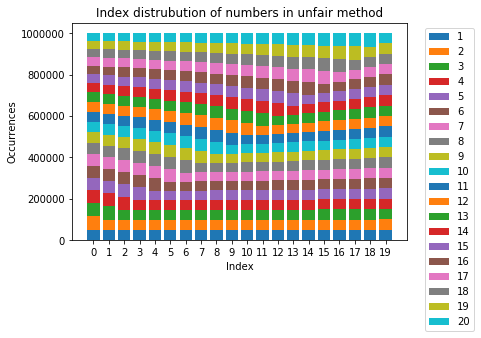

In [8]:
form_chart(unfair)
plt.ylabel('Occurrences')
plt.xlabel('Index')
plt.title('Index distrubution of numbers in unfair method')
plt.xticks(indices, range(numberOfBins))
plt.legend(bbox_to_anchor=(1.04, 1)) #move legend to the side
plt.savefig('unfair.png') #deposit on disk
plt.show()

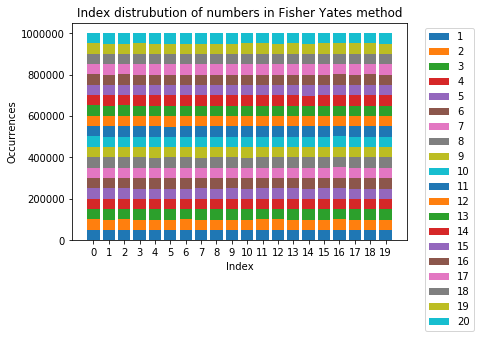

In [9]:
form_chart(yates)
plt.ylabel('Occurrences')
plt.xlabel('Index')
plt.title('Index distrubution of numbers in Fisher Yates method')
plt.xticks(indices, range(numberOfBins))
plt.legend(bbox_to_anchor=(1.04, 1))
plt.savefig('yates.png')
plt.show()

From the above graphs, it becomes clear that the unfair shuffling method has a distorted representation of the data, particularly toward the top left of the chart.  The Fisher Yates method has no such distortion, and as such, should be the method of choice for applications needing fair shuffling.